# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests
from datetime import datetime
import time

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid=c35ab26509b363d4f5cd20b422d99205&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        response.raise_for_status()  # Raise an error for bad responses

        # Parse the JSON and retrieve data
        data = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data["coord"]["lat"]
        city_lng = data["coord"]["lon"]
        max_temp = data["main"]["temp_max"]
        city_humidity = data["main"]["humidity"]  # Humidity is found in the 'main' section
        city_clouds = data["clouds"]["all"]  # Cloudiness is found in the 'clouds' section
        city_wind = data["wind"]["speed"]  # Wind speed is found in the 'wind' section
        city_country = data["sys"]["country"]  # Country code is found in the 'sys' section
        city_date = datetime.fromtimestamp(data["dt"]).strftime('%Y-%m-%d %H:%M:%S')  # Format: YYYY-MM-DD HH:MM:SS

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}. Skipping...")
        pass
    except KeyError:
        print("City not found in the response. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | horta
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | camana
Processing Record 5 of Set 1 | serdar
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | chernomorskoye
Processing Record 9 of Set 1 | penrith
Processing Record 10 of Set 1 | rio grande
Processing Record 11 of Set 1 | la passe
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | diapaga
Processing Record 14 of Set 1 | brisas de zicatela
Processing Record 15 of Set 1 | hammerfest
Processing Record 16 of Set 1 | ordos
Request failed: 404 Client Error: Not Found for url: http://api.openweathermap.org/data/2.5/weather?q=ordos&appid=c35ab26509b363d4f5cd20b422d99205&units=metric. Skipping...
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | chonchi
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,1.33,41,40,7.00,RU,2024-11-11 22:14:48
1,horta,38.5333,-28.6333,20.57,95,100,7.60,PT,2024-11-11 22:19:38
2,port-aux-francais,-49.3500,70.2167,5.18,93,100,9.63,TF,2024-11-11 22:19:40
3,camana,-16.6228,-72.7111,18.12,87,77,2.08,PE,2024-11-11 22:19:41
4,serdar,38.9764,56.2757,10.29,83,100,0.99,TM,2024-11-11 22:19:42


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,1.33,41,40,7.00,RU,2024-11-11 22:14:48
1,horta,38.5333,-28.6333,20.57,95,100,7.60,PT,2024-11-11 22:19:38
2,port-aux-francais,-49.3500,70.2167,5.18,93,100,9.63,TF,2024-11-11 22:19:40
3,camana,-16.6228,-72.7111,18.12,87,77,2.08,PE,2024-11-11 22:19:41
4,serdar,38.9764,56.2757,10.29,83,100,0.99,TM,2024-11-11 22:19:42


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

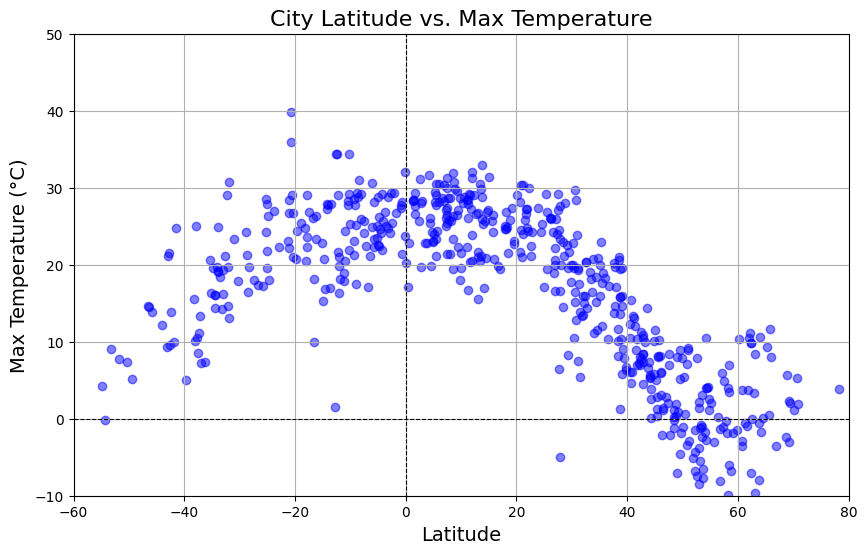

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature', fontsize=16)  # Set title with font size
plt.xlabel('Latitude', fontsize=14)  # Set x-axis label with font size
plt.ylabel('Max Temperature (°C)', fontsize=14)  # Set y-axis label with font size
plt.grid(True)  # Add grid for better readability
plt.xlim(-60, 80)  # Set x-axis limits (latitude range)
plt.ylim(-10, 50)  # Set y-axis limits (temperature range)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at x=0

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

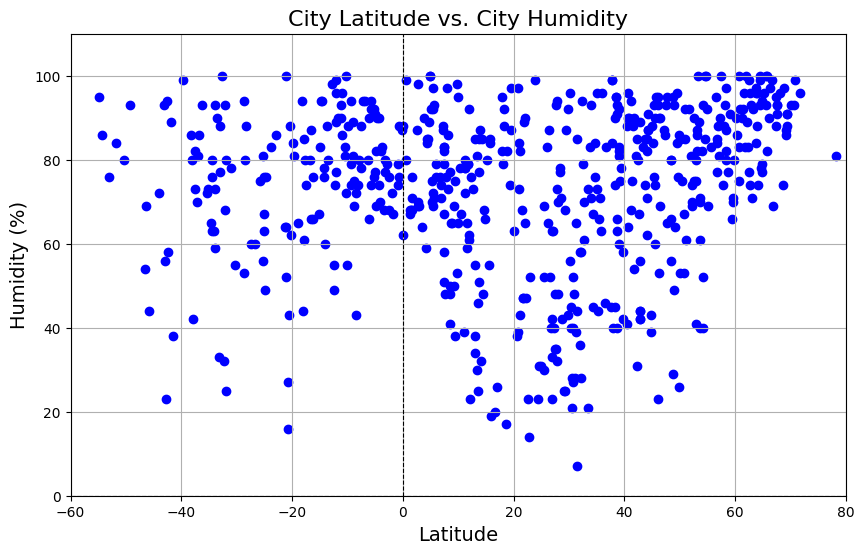

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color='blue')

# Incorporate the other graph propertiesplt.title('City Latitude vs. City Humidity', fontsize=16)  # Set title with font size
plt.title('City Latitude vs. City Humidity', fontsize=16)  # Set title with font size
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.grid(True)
plt.xlim(-60, 80)  # Set x-axis limits (latitude range)
plt.ylim(0, 110)  # Set y-axis limits (humidity range)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at x=0

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

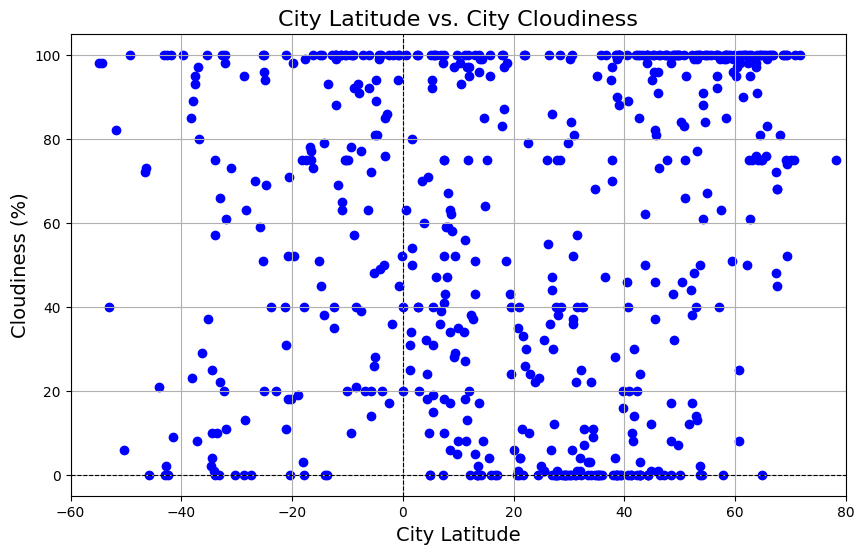

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color='blue')

# Incorporate the other graph properties
plt.title('City Latitude vs. City Cloudiness', fontsize=16)  # Set title with font size
plt.xlabel('City Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid(True)
plt.xlim(-60, 80)  # Set x-axis limits (latitude range)
plt.ylim(-5, 105)  # Set y-axis limits (humidity range)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at x=0

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

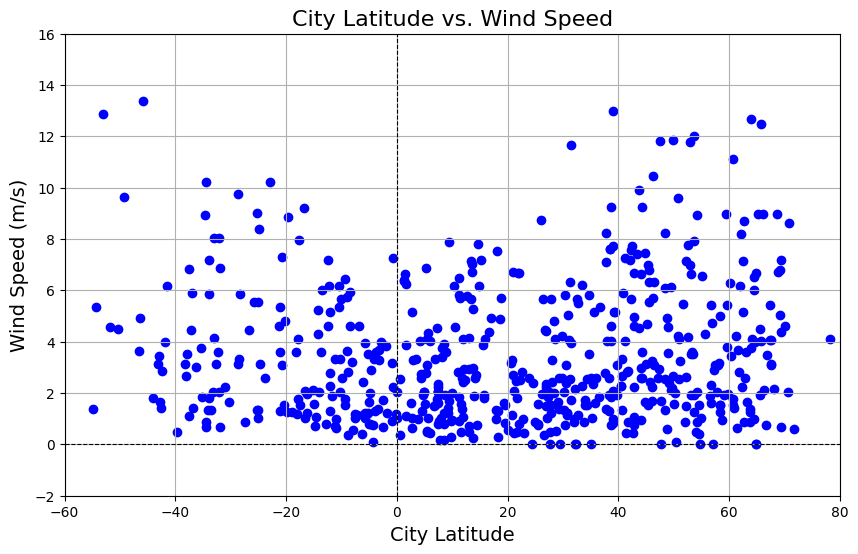

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', color='blue')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed', fontsize=16)  # Set title with font size
plt.xlabel('City Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.grid(True)
plt.xlim(-60, 80)  # Set x-axis limits (latitude range)
plt.ylim(-2, 16)  # Set y-axis limits (humidity range)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at x=0

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(data, x_col, y_col):
    # Extract x and y values
    x = data[x_col]
    y = data[y_col]
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data Points')
    
    # Create regression line
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='red', label='Regression Line')
    
    # Add titles and labels
    plt.title(f'Linear Regression: {y_col} vs. {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    # Display the equation and R-squared value
    plt.text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}', 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    # Add grid and legend
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Assuming you already have a DataFrame named 'weather_data' that contains the latitude information
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,1.33,41,40,7.00,RU,2024-11-11 22:14:48
1,horta,38.5333,-28.6333,20.57,95,100,7.60,PT,2024-11-11 22:19:38
4,serdar,38.9764,56.2757,10.29,83,100,0.99,TM,2024-11-11 22:19:42
6,anadyr,64.7500,177.4833,-12.72,78,75,4.00,RU,2024-11-11 22:19:45
7,chernomorskoye,45.5039,32.6997,7.97,74,82,6.80,UA,2024-11-11 22:19:46


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,5.18,93,100,9.63,TF,2024-11-11 22:19:40
3,camana,-16.6228,-72.7111,18.12,87,77,2.08,PE,2024-11-11 22:19:41
5,waitangi,-43.9535,-176.5597,12.12,72,21,1.79,NZ,2024-11-11 22:19:44
9,rio grande,-32.0350,-52.0986,14.58,68,100,8.03,BR,2024-11-11 22:19:49
15,grytviken,-54.2811,-36.5092,-0.22,86,98,5.37,GS,2024-11-11 22:19:57


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7558553923728338


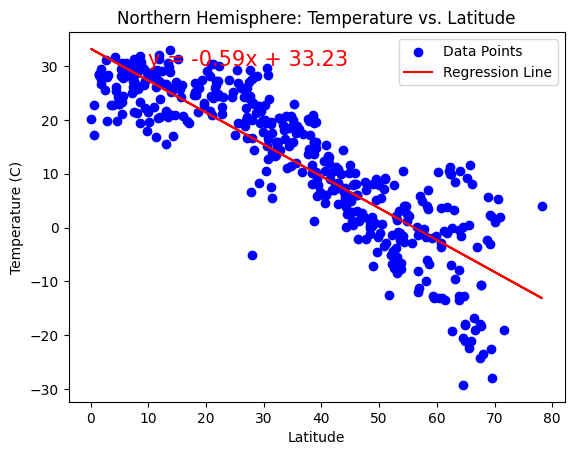

In [15]:
# Linear regression on Northern Hemisphere
# Assuming northern_hemi_df is already created and contains 'Lat' and 'Max Temp' columns
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Calculate the regression line
regression_line = slope * x_values + intercept

# Calculate R-squared value
r_squared = rvalue**2
print(f"The r^2-value is: {r_squared}")

# Create the scatter plot
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Regression Line')

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.legend()

# Annotate the line with the equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (10, 30), fontsize=15, color="red")

# Show plot
plt.show()


The r^2-value is: 0.4236537754058386


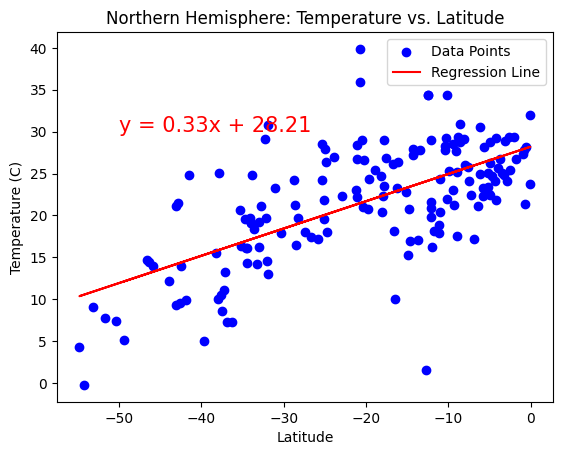

In [16]:
# Linear regression on Northern Hemisphere
# Assuming northern_hemi_df is already created and contains 'Lat' and 'Max Temp' columns
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Calculate the regression line
regression_line = slope * x_values + intercept

# Calculate R-squared value
r_squared = rvalue ** 2
print(f"The r^2-value is: {r_squared}")

# Create the scatter plot
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Regression Line')

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.legend()

# Annotate the line with the equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (-50, 30), fontsize=15, color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** The further from 0 the latitude gets the colder temperature gets. Inverse Correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.08183702626912488


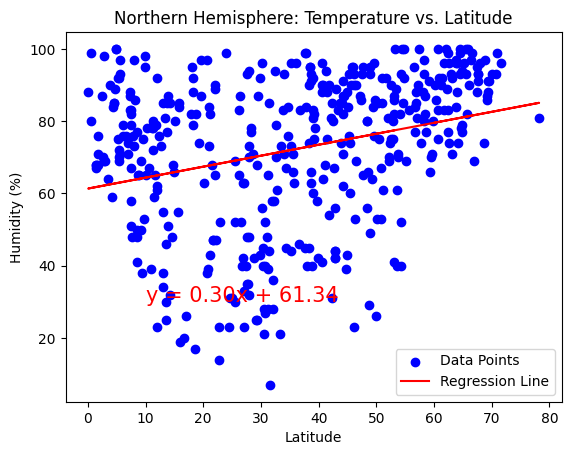

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Calculate the regression line
regression_line = slope * x_values + intercept

# Calculate R-squared value
r_squared = rvalue**2
print(f"The r^2-value is: {r_squared}")

# Create the scatter plot
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Regression Line')

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.legend()

# Annotate the line with the equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (10, 30), fontsize=15, color="red")

# Show plot
plt.show()

The r^2-value is: 0.02744370993971693


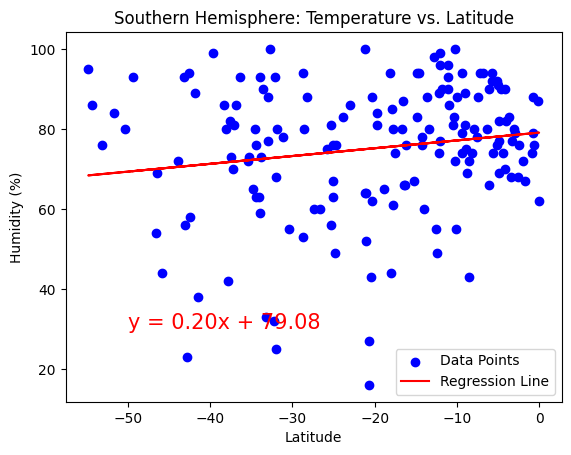

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Calculate the regression line
regression_line = slope * x_values + intercept

# Calculate R-squared value
r_squared = rvalue**2
print(f"The r^2-value is: {r_squared}")

# Create the scatter plot
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Regression Line')

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.legend()

# Annotate the line with the equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (-50, 30), fontsize=15, color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** Direct correlation btw temperature and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.09253812995360512


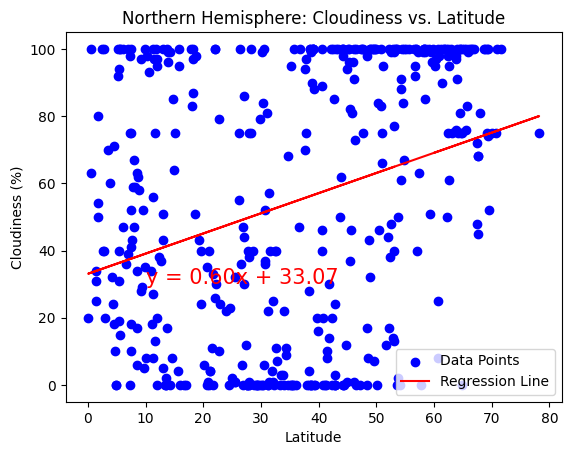

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Calculate the regression line
regression_line = slope * x_values + intercept

# Calculate R-squared value
r_squared = rvalue**2
print(f"The r^2-value is: {r_squared}")

# Create the scatter plot
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Regression Line')

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.legend()

# Annotate the line with the equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (10, 30), fontsize=15, color="red")

# Show plot
plt.show()

The r^2-value is: 0.03503958750444164


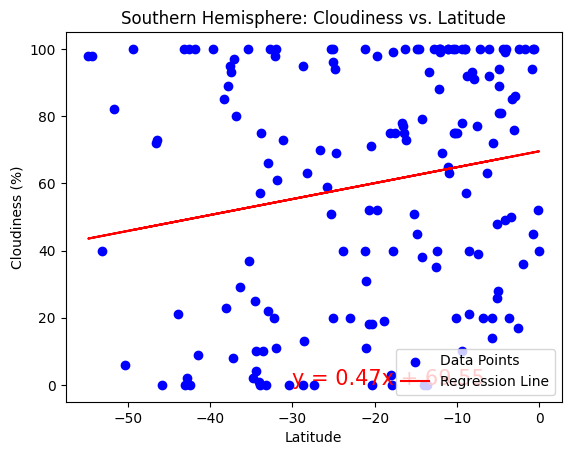

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Calculate the regression line
regression_line = slope * x_values + intercept

# Calculate R-squared value
r_squared = rvalue**2
print(f"The r^2-value is: {r_squared}")

# Create the scatter plot
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Regression Line')

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.legend()

# Annotate the line with the equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (-30, 0), fontsize=15, color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** There appears to be no direct correlation between cloudiness and latitutde. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.045181261640766246


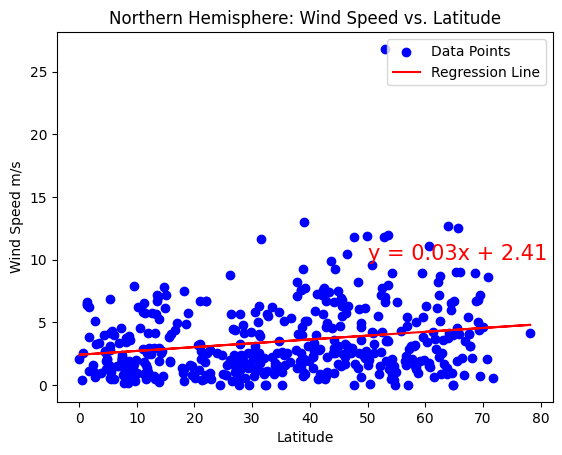

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Calculate the regression line
regression_line = slope * x_values + intercept

# Calculate R-squared value
r_squared = rvalue**2
print(f"The r^2-value is: {r_squared}")

# Create the scatter plot
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Regression Line')

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.legend()

# Annotate the line with the equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (50, 10), fontsize=15, color="red")

# Show plot
plt.show()

The r^2-value is: 0.09020634543216088


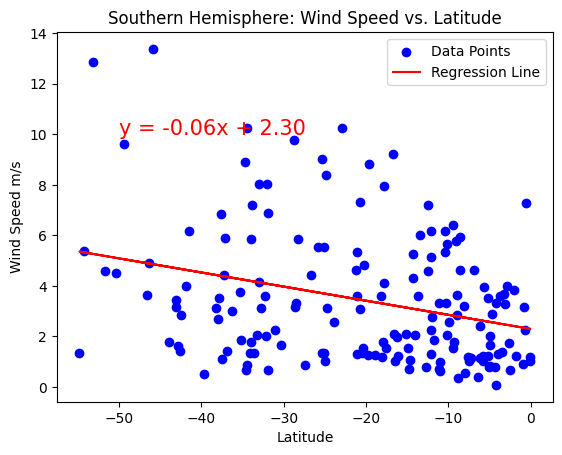

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Calculate the regression line
regression_line = slope * x_values + intercept

# Calculate R-squared value
r_squared = rvalue**2
print(f"The r^2-value is: {r_squared}")

# Create the scatter plot
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Regression Line')

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.legend()

# Annotate the line with the equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (-50, 10), fontsize=15, color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is an inverse correlation between windspeed and latitude.  